In [80]:
import pandas as pd
dataset=pd.read_csv(r'C:\Users\HP\Downloads\archive (3)\IMDB Dataset.csv', engine='python', on_bad_lines='warn')
df=pd.DataFrame(dataset)

In [ ]:
df.isnull().sum()
df.duplicated().sum()

np.int64(418)

In [ ]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [ ]:
df['review']=df['review'].apply(lambda x:x.lower()) #lambda creates a small, one-line function without giving it a name, no need to create function seperate function for lowercase

In [84]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw_list=stopwords.words('english')
df['review']=df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
x=df.iloc[:,0:1]
y=df['sentiment']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#random state is set 0 for reproducibility of results on local machine

In [ ]:
#Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000) #Only the top 3000 most frequent words in the dataset will be kept.
x_train_bow=cv.fit_transform(x_train['review']).toarray()
x_test_bow=cv.transform(x_test['review']).toarray()

In [88]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_bow, y_train)
ypred = mnb.predict(x_test_bow)

In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,ypred)
print(accuracy)
confusion_matrix(y_test,ypred)

0.8429


array([[4231,  804],
       [ 767, 4198]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_bow,y_train)
ypred=rf.predict(x_test_bow)
acc=accuracy_score(y_test,ypred)
print(acc) #accuracy Using BoW
confusion_matrix(y_test,ypred)

0.8396


array([[4266,  769],
       [ 835, 4130]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# generate confusion matrix
cm = confusion_matrix(y_test, ypred)

# plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (TF-IDF + Random Forest)")
plt.show()


In [ ]:
#using tf/idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,4),max_features=20000) #we can improve its accuracy by changing ngram range(unigram,bigram,trigram) and max_features
x_train_tf=tf.fit_transform(x_train['review']).toarray()
x_test_tf=tf.transform(x_test['review']).toarray()
rf.fit(x_train_tf,y_train) #rf=RandomForestClassifier
ypred=rf.predict(x_test_tf)
accurcay_tf=accuracy_score(y_test,ypred)
print(accurcay_tf)
confusion_matrix(y_test,ypred)

0.8591


array([[4368,  667],
       [ 742, 4223]])

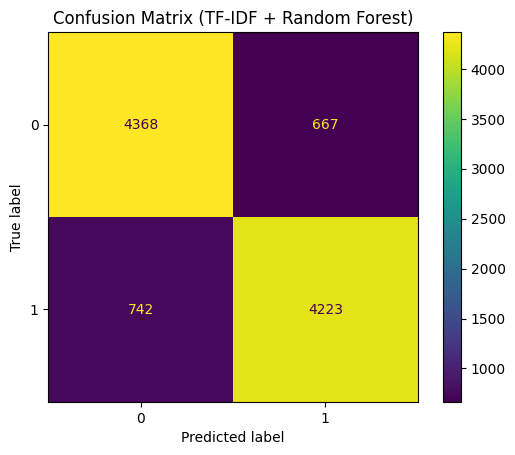

In [ ]:
# generate confusion matrix
cm = confusion_matrix(y_test, ypred)

# plotting
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (TF-IDF + Random Forest)")
plt.show()


In [93]:
new_text = ["this movie was neither good nor bad"]

# convert text to TF-IDF vector
new_text_tf = tf.transform(new_text).toarray()

# predicting positive(1) or negative(0)
prediction = rf.predict(new_text_tf)
print("Predicted class:", prediction[0])

Predicted class: 0
